In [1]:
# INTRODUCTION:

# Traffic prediction dataset contains traffic data collected using a computer vision model that detects four types of vehicles: cars, bikes,
                     # buses, and trucks.
# The dataset includes the following columns:
 #  Date: Day of the month.
 #   Day of the week: Name of the day.
 #   CarCount, BikeCount, BusCount, TruckCount: Counts of respective vehicles.
 #   Total: Total vehicle count.
 #   Traffic Situation: Categorized into four classes (1-Heavy, 2-High, 3-Normal, 4-Low).

In [2]:
# AIM:

# This analysis aims to explore the dataset, preprocess the data, and build a machine learning model to predict traffic situations.

In [3]:
# OBJECTIVES:

#1.situation prediction:develop a mechine learning model that predicts the situation of traffic
#2. Traffic Congestion Detection: Identify areas of high traffic congestion and predict the likelihood of congestion occurring.
#3. Traffic Situation Classification: Classify traffic situations into categories such as free flow, slow traffic, or congestion.
#4.classification:classify vehicles count into different types vehicles (CarCount,BikeCount,BusCount,TruckCount) using classification algorithms
#5.data preprocessing:clean and prepare the dataset for model training by handling missing values, normalizing data, and splitting it into training and
#                      testingsets

In [4]:
# DATA ANALYSIS:

# Exploratory Data Analysis (EDA)

# Exploratory data analysis is crucial to uncover patterns, identify anomalies, and understand the relationships between different features.
# The goal is to summarize the main characteristics of the dataset and make initial hypotheses.Key Steps:

# Data Cleaning: Handle missing values, duplicate entries, and outliers.

# Descriptive Statistics: Summarize key statistics such as mean, median, standard deviation, and range for numerical features like types of vehicles count.

#    Data Distribution:
#        Plot histograms or density plots for traffic situation, types of vehicles, and other key variables to understand their distribution.
#       Check if data is normally distributed or skewed, which might influence model choice later on.

#   Correlations:
#       Calculate pairwise correlations between type of vehicles, total number of vehicles and other numerical features to identify important
#         relationships.Use a heatmap to visualize correlations.

#   Geospatial Analysis:
#        Visualize traffic conditions across various locations using geographical plots (e.g., heatmaps or scatter plots on a map).
#        If the dataset includes latitude and longitude, create geospatial visualizations to explore traffic density or speed across locations.

In [5]:
# IMPORTING LIBRARIES:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier

In [6]:
df=pd.read_csv("/content/Traffic(3).csv")
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,10,Tuesday,31,0,4,4,39,low
1,10,Tuesday,49,0,3,3,55,low
2,10,Tuesday,46,0,3,6,55,low
3,10,Tuesday,51,0,2,5,58,low
4,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...
2971,9,Thursday,16,3,1,36,56,normal
2972,9,Thursday,11,0,1,30,42,normal
2973,9,Thursday,15,4,1,25,45,normal
2974,9,Thursday,16,5,0,27,48,normal


In [7]:
df.isna().sum()

,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [8]:
df.dtypes

,0
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [9]:
le=LabelEncoder()
df["Day of the week"]=le.fit_transform(df["Day of the week"])
df.dtypes

,0
Date,int64
Day of the week,int64
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [10]:
X=df.iloc[:,:-1]
X

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10,5,31,0,4,4,39
1,10,5,49,0,3,3,55
2,10,5,46,0,3,6,55
3,10,5,51,0,2,5,58
4,10,5,57,6,15,16,94
...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56
2972,9,4,11,0,1,30,42
2973,9,4,15,4,1,25,45
2974,9,4,16,5,0,27,48


In [11]:
y=df.iloc[:,-1]
y

,Traffic Situation
0,low
1,low
2,low
3,low
4,normal
...,...
2971,normal
2972,normal
2973,normal
2974,normal


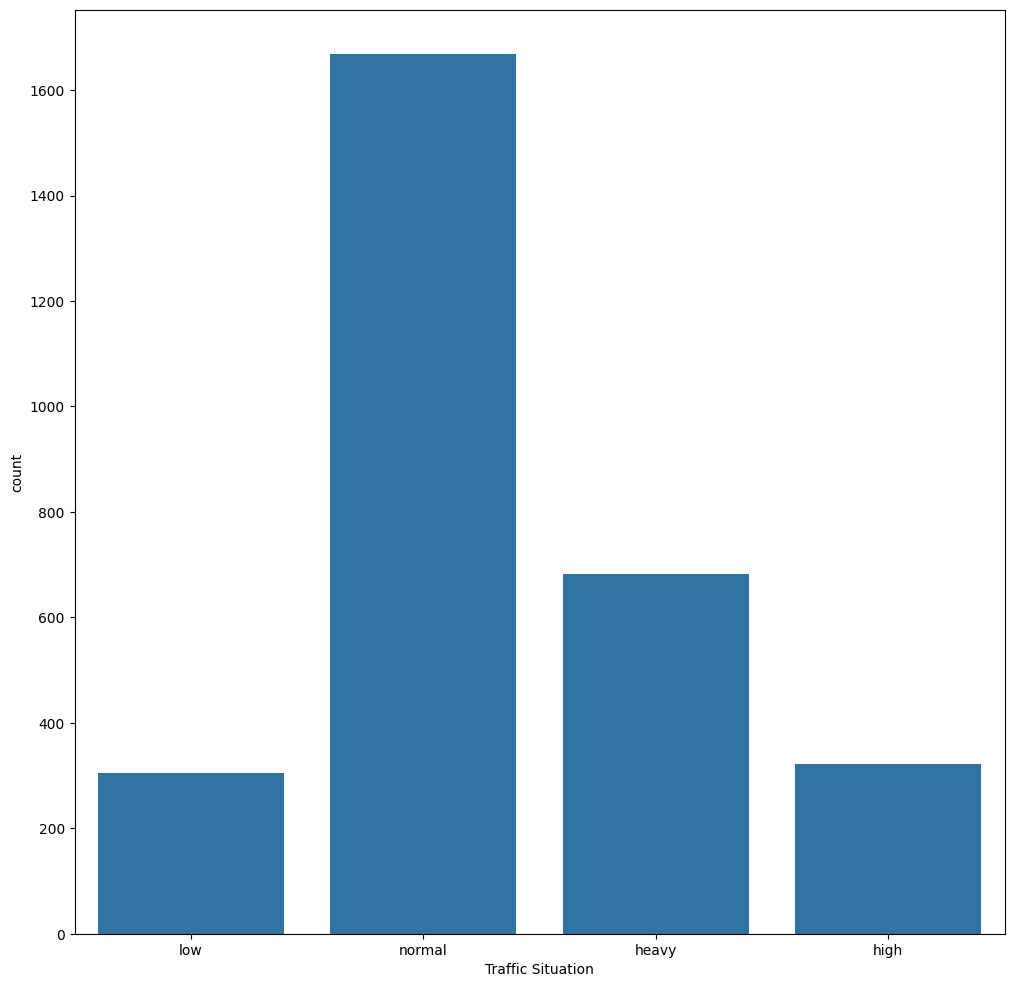

In [12]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Traffic Situation')
plt.show()

In [13]:
# 0=friday
# 1=monday
# 2=saturday
# 3=sunday
# 4=thursday
# 5=tuesday
# 6=wednesday

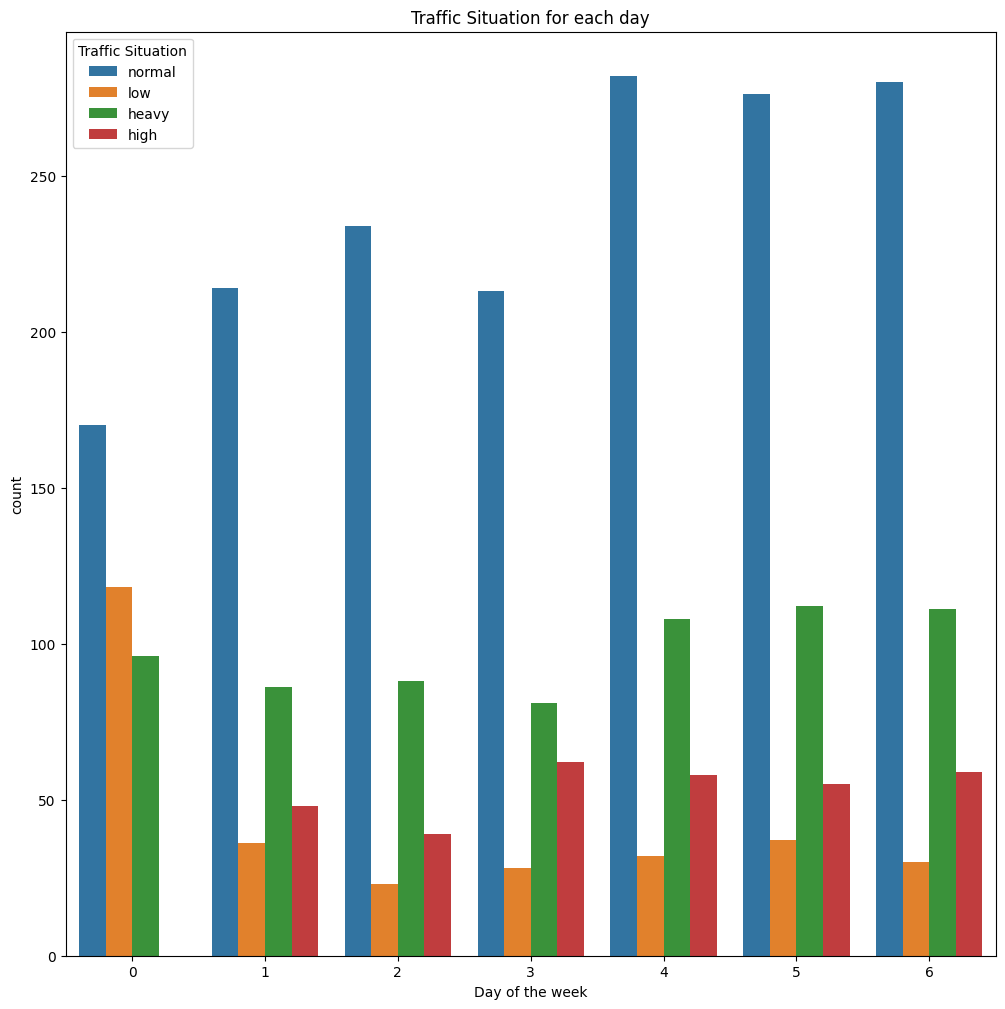

In [14]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

In [15]:
# oversampling
y.value_counts()

,count
Traffic Situation,
normal,1669
heavy,682
high,321
low,304


In [16]:
over=SMOTE()
X,y=over.fit_resample(X,y)

In [17]:
y.value_counts()

,count
Traffic Situation,
low,1669
normal,1669
heavy,1669
high,1669


In [18]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.3       , 0.83333333, 0.14367816, ..., 0.08      , 0.1       ,
        0.06976744],
       [0.3       , 0.83333333, 0.24712644, ..., 0.06      , 0.075     ,
        0.13178295],
       [0.3       , 0.83333333, 0.22988506, ..., 0.06      , 0.15      ,
        0.13178295],
       ...,
       [0.4       , 0.16666667, 0.39655172, ..., 0.12      , 0.225     ,
        0.31007752],
       [0.33333333, 0.33333333, 0.14367816, ..., 0.04      , 0.15      ,
        0.07751938],
       [0.83333333, 0.        , 0.22413793, ..., 0.1       , 0.225     ,
        0.17829457]])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=2)

In [20]:
knn=KNeighborsClassifier()
sv=SVC()
rt=RandomForestClassifier()
ad=AdaBoostClassifier()
lst=[knn,sv,rt,ad]
for i in lst:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

       heavy       0.94      0.96      0.95       497
        high       0.88      0.97      0.92       491
         low       0.90      1.00      0.95       502
      normal       0.99      0.79      0.88       513

    accuracy                           0.93      2003
   macro avg       0.93      0.93      0.92      2003
weighted avg       0.93      0.93      0.92      2003

SVC()
              precision    recall  f1-score   support

       heavy       0.97      0.99      0.98       497
        high       0.95      0.98      0.96       491
         low       0.93      1.00      0.96       502
      normal       0.98      0.86      0.92       513

    accuracy                           0.96      2003
   macro avg       0.96      0.96      0.96      2003
weighted avg       0.96      0.96      0.95      2003

RandomForestClassifier()
              precision    recall  f1-score   support

       heavy       1.

In [21]:
BC=BaggingClassifier()
ET=ExtraTreesClassifier()
HBC=HistGradientBoostingClassifier()
GBC=GradientBoostingClassifier()
DC=DummyClassifier()
lst=[BC,ET,HBC,GBC,DC]
for i in lst:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

BaggingClassifier()
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       497
        high       1.00      1.00      1.00       491
         low       1.00      1.00      1.00       502
      normal       1.00      1.00      1.00       513

    accuracy                           1.00      2003
   macro avg       1.00      1.00      1.00      2003
weighted avg       1.00      1.00      1.00      2003

ExtraTreesClassifier()
              precision    recall  f1-score   support

       heavy       0.99      1.00      0.99       497
        high       0.98      1.00      0.99       491
         low       0.99      1.00      0.99       502
      normal       1.00      0.96      0.98       513

    accuracy                           0.99      2003
   macro avg       0.99      0.99      0.99      2003
weighted avg       0.99      0.99      0.99      2003

HistGradientBoostingClassifier()
              precision    recall  f1-score   support


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[]

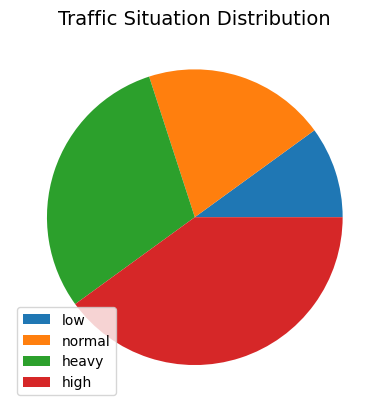

In [22]:
# pie plot

x=[1,2,3,4]
xlabel=["low","normal","heavy","high"]
plt.pie(x)
plt.title("Traffic Situation Distribution",fontsize=14)

plt.legend(xlabel,loc="lower left")
plt.plot()

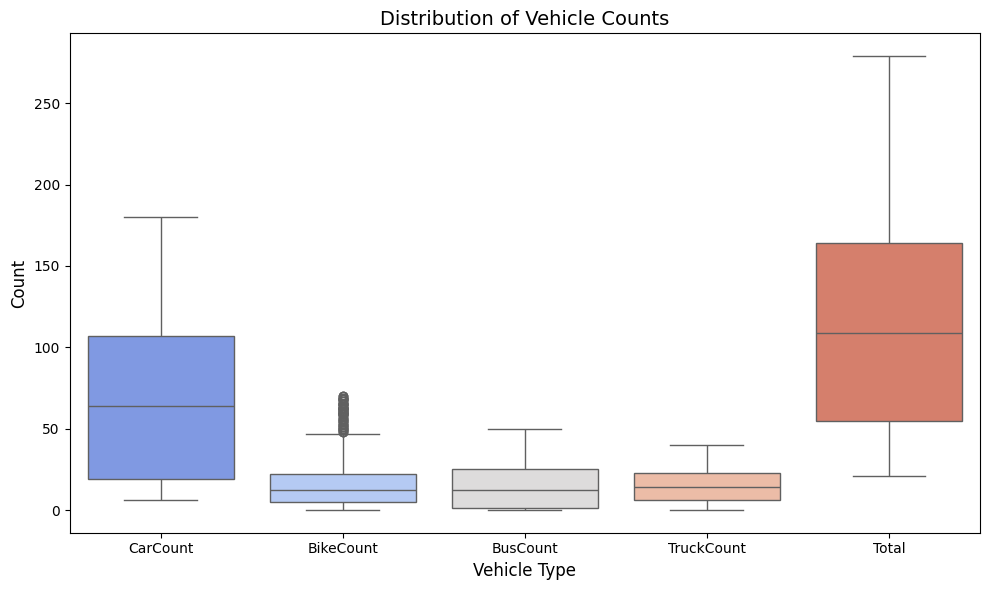

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']], palette='coolwarm')

plt.title('Distribution of Vehicle Counts', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

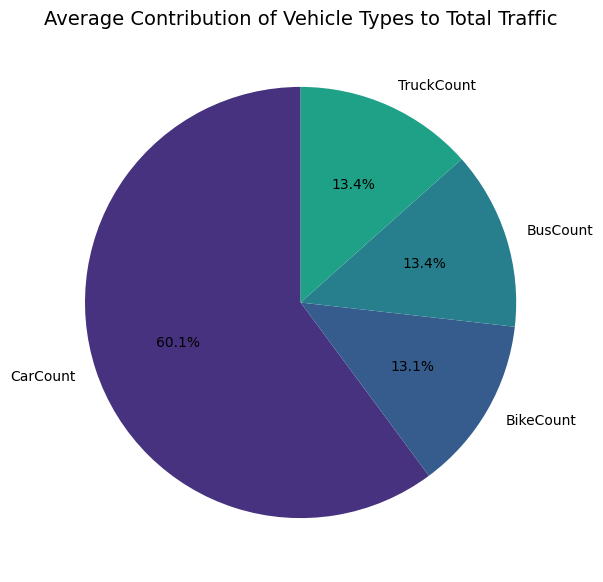

In [24]:
average_vehicle_counts = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()
plt.figure(figsize=(7, 7))
plt.pie(average_vehicle_counts, labels=average_vehicle_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Average Contribution of Vehicle Types to Total Traffic', fontsize=14)
plt.show()

<ipython-input-25-973f7edc17bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Traffic Situation', y='Total', data=df, palette='Set2')


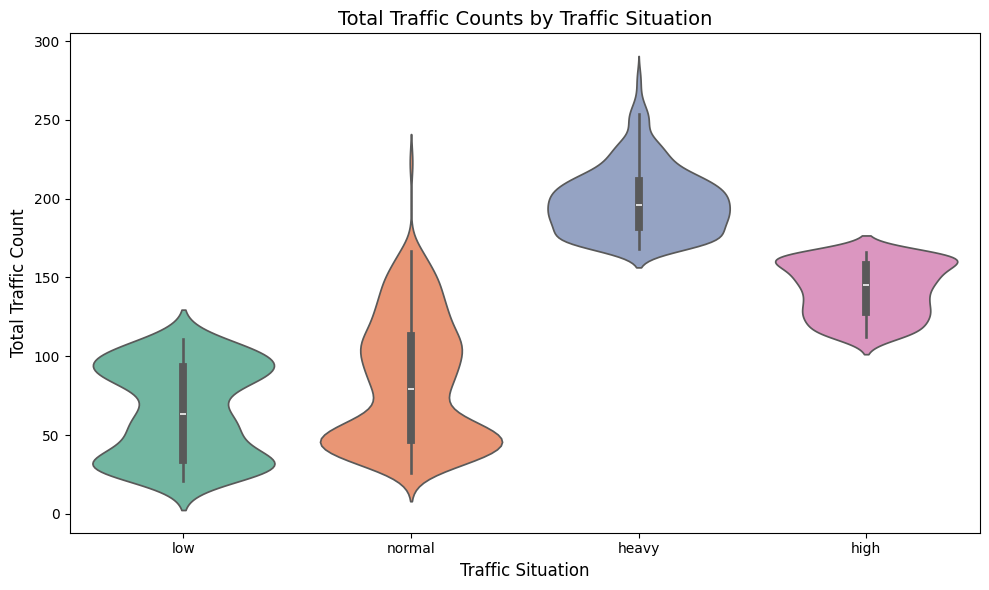

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Traffic Situation', y='Total', data=df, palette='Set2')

plt.title('Total Traffic Counts by Traffic Situation', fontsize=14)
plt.xlabel('Traffic Situation', fontsize=12)
plt.ylabel('Total Traffic Count', fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
df["Traffic Situation"]=le.fit_transform(df["Traffic Situation"])

In [27]:
df.dtypes

,0
Date,int64
Day of the week,int64
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,int64


In [28]:
#sremlit
import joblib

In [29]:
joblib.dump(rt,"model.project")

['model.project']

In [30]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load('model.project')
st.title('TRAFFIC PREDICTION')
Date=st.slider('Date',1.000000,31.000000)
Day_of_the_week=st.slider('Day of the week',0.000000,6.000000)
CarCount=st.slider('CarCount',6.000000,180.000000)
BikeCount=st.slider('BikeCount',0.000000,70.000000)
BusCount=st.slider('BusCount',0.000000,50.000000)
TruckCount=st.slider('TruckCount',0.000000,40.000000)
Total=st.slider('Total',21.000000,279.000000)
input=[[Date,Day_of_the_week,CarCount,BikeCount,BusCount,TruckCount,Total]]
model=joblib.load('model.project')
if st.button('Predict'):
   pred=model.predict(input)
   st.write(f'Prediction:{pred}')

Writing app.py


In [31]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [32]:
!wget -q -O - ipv4.icanhazip.com

34.23.176.97


In [33]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.176.97:8501

  Stopping...
^C


In [34]:
#conclusion

# This analysis provided a comprehensive overview of the traffic dataset, including exploratory data analysis,
# preprocessing, and model training. The RandomForest Classifier showed promising results in predicting traffic
# situations based on vehicle counts. Future work can include more advanced models and additional features such as
# vehicle speed and traffic intersection data to further enhance prediction accuracy.